In [1]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 133kB 13.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219263 sha256=c95ec7313594d0145eb6b64890a36bfecf5921e2610f56cee8aebebfc49d348b
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_roc_curve, make_scorer, balanced_accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [5]:
data = pd.read_csv('BRCA_pam50.tsv', sep='\t', index_col=0)
X = data.iloc[:, :-1].to_numpy()
y = data["Subtype"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  stratify=y, test_size=0.2, random_state=13)

In [7]:
model = RandomForestClassifier(class_weight="balanced", random_state=13)
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 9]}
clf = GridSearchCV(model, params, scoring=make_scorer(balanced_accuracy_score), 
                   n_jobs=-1, cv=RepeatedStratifiedKFold(n_repeats=10))
clf.fit(X, y)
print(clf.best_params_)
y_pred = clf.predict(X_test)
round(balanced_accuracy_score(y_pred, y_test), 3)

{'max_depth': 5, 'n_estimators': 100}


0.964

Problem 4

In [31]:
with open("bc_data.pkl", "rb") as fh:
  data = pickle.load(fh)
#ann = pd.read_pickle("bc_ann.pkl")

In [4]:
data

,A1CF,A2M,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AASDHPPT,AATF,AATK,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA7,ABCB6,ABCB7,ABCC1,ABCC3,ABCC5,ABCC8,ABCD3,ABCD4,ABCE1,ABCG1,ABCG2,ABHD10,ABHD11,ABHD14A,ABHD17A,ABHD17B,ABHD2,ABHD3,ABHD6,ABI1,ABITRAM,ABL1,ABLIM1,...,ZNF611,ZNF638,ZNF652,ZNF654,ZNF665,ZNF669,ZNF671,ZNF688,ZNF692,ZNF706,ZNF721,ZNF729,ZNF747,ZNF768,ZNF787,ZNF8,ZNF816-ZNF321P,ZNF83,ZNF835,ZNF839,ZNF84,ZNF862,ZNF91,ZNF93,ZNHIT1,ZNHIT3,ZNHIT6,ZNRD2,ZP3,ZPR1,ZRSR2,ZSCAN18,ZSCAN31,ZSCAN32,ZSWIM8,ZW10,ZWILCH,ZWINT,ZYX,ZZEF1
GSM107072,6.171391,10.848897,7.777530,7.606607,6.394179,7.144505,8.254429,9.353714,8.054501,8.665148,7.632158,6.886835,7.669779,6.848743,7.222003,6.034916,5.986230,7.144186,6.196714,7.995822,6.983385,8.173358,6.313581,9.318190,6.341621,7.373249,6.909275,5.924404,7.767520,8.861164,7.544949,8.827126,6.070193,9.224957,7.161245,6.123412,8.140515,7.689975,8.561911,7.202397,...,7.293976,8.953298,8.618066,6.124311,8.433518,5.750273,6.275486,6.593155,7.192746,9.803022,8.602643,7.495658,7.850001,6.521370,5.831974,7.083929,6.300919,5.562651,7.049457,6.382777,6.150120,7.425672,9.653187,8.209671,8.975433,8.109269,6.731827,7.389423,6.401264,6.881578,7.822262,6.745400,5.613649,6.914217,7.710242,7.356916,6.417884,7.614747,9.248246,7.155962
GSM107073,6.580377,9.739404,8.172784,7.859401,6.304567,7.394661,8.525408,9.741925,8.560564,8.856241,8.132276,5.645256,7.507052,7.450073,6.704000,6.211671,5.949707,8.281787,6.072300,7.955692,6.806561,8.527710,6.704896,8.605511,6.776315,7.264981,7.402937,5.577467,7.679648,9.479650,7.574796,9.210605,6.035991,8.841193,7.469725,5.724950,7.874472,7.947536,8.052039,6.780625,...,6.900842,8.599503,8.693684,6.015252,8.001261,5.824342,6.649958,7.472515,7.722203,10.467321,8.160194,7.155255,8.548111,7.060332,6.111531,6.945188,6.388945,5.265705,7.125132,6.816834,5.897896,7.206886,8.598764,8.041750,8.822321,8.091556,7.190954,8.207227,7.667927,7.390836,7.924955,6.499876,6.353428,7.721992,7.909205,7.808439,7.170811,8.820814,9.134095,6.715871
GSM107074,6.941675,9.989207,8.175175,7.485449,6.215530,6.989786,8.169714,8.689155,8.053919,8.101290,7.985366,9.159747,6.538387,7.721882,7.325122,6.482432,6.358550,7.042121,6.632325,7.871062,6.656193,8.386513,7.912395,10.294695,6.846117,7.317946,8.443045,6.031640,8.078332,8.785642,7.436543,8.963961,6.637713,8.726809,7.826194,6.618662,7.583457,7.609419,8.527630,7.648515,...,7.106506,9.243203,8.466885,6.280159,8.532141,6.113095,6.997377,7.084454,7.511471,9.169220,7.970419,8.531963,8.818258,7.123144,6.152156,7.136306,6.707213,5.201309,7.217826,7.120479,6.276923,8.084791,10.401807,8.717183,7.583350,7.427547,6.317622,7.057689,6.211835,6.646001,7.877878,8.917324,6.192780,7.558263,8.452266,7.750089,5.951289,8.746304,9.316072,7.228517
GSM107075,6.523469,11.243880,7.286647,7.695029,7.172579,7.186385,8.209839,9.189049,7.943373,8.116367,7.503274,6.021790,7.715514,7.029631,6.849684,6.368713,6.211554,7.129496,6.469501,7.809029,7.130205,8.908194,6.831100,9.368678,7.012000,6.534775,6.793636,6.137585,8.330775,8.407227,7.800756,9.329515,6.066097,8.163397,7.870532,6.316148,6.902217,8.127363,9.157874,9.011953,...,7.834318,9.336443,7.639775,6.045118,8.214617,6.002717,6.945540,6.972846,7.763177,9.726959,9.006187,8.321545,8.063477,7.487123,5.876094,7.119933,6.428658,5.515647,7.221138,6.686541,6.338256,7.889939,9.406647,8.010448,8.292586,7.244232,6.955452,7.281808,6.990130,6.745574,7.544273,8.758563,5.863965,7.308410,8.484508,7.453132,6.192658,7.719506,9.237652,7.495225
GSM107076,6.592214,11.302001,7.628476,6.610815,6.417622,7.559106,8.216323,9.157618,7.924746,8.321233,7.958118,7.620256,7.325473,7.038486,7.537828,6.091105,5.823535,7.195798,6.542115,7.733718,6.924216,7.540393,7.061598,9.880325,6.693552,7.417898,6.669280,6.040332,7.600312,8.520601,7.743187,9.195345,5.990562,8.458841,7.006705,6.125494,7.536772,7.929118,8.737456,8.132052,...,7.778385,8.913941,8.409252,6.218776,8.757647,5.887335,6.946344,6.755557,7.469931,9.494378,8.992335,7.929211,8.148525,6.955647,5.984586,7.188276,6.161274,5.608434,7.0

In [26]:
with open("bc_ann.pkl", "rb") as fh:
  ann = pickle.load(fh)

In [7]:
ann

,Class,Dataset,Dataset type
GSM107072,1,GSE1456,Validation
GSM107073,0,GSE1456,Validation
GSM107074,0,GSE1456,Validation
GSM107075,0,GSE1456,Validation
GSM107076,0,GSE1456,Validation
...,...,...,...
GSM441916,0,GSE17705,Filtration
GSM441917,0,GSE17705,Filtration
GSM441918,0,GSE17705,Filtration
GSM441919,0,GSE17705,Filtration


In [6]:
genes = "TRIP13;UBE2C;ZWINT;EPN3;KIF4A;ECHDC2;MTFR1;STARD13;IGFBP6;NUMA1;CCNL2".split(";")

In [27]:
X_train = data.loc[ann.loc[ann["Dataset type"] == "Training"].index].to_numpy()
y_train = ann.loc[ann["Dataset type"] == "Training", "Class"].to_numpy()
X_test = data.loc[ann.loc[ann["Dataset type"] == "Validation"].index].to_numpy()
y_test = ann.loc[ann["Dataset type"] == "Validation", "Class"].to_numpy()

Balanced accuracy score: 0.5926402470406588
0.75 0.4583333333333333


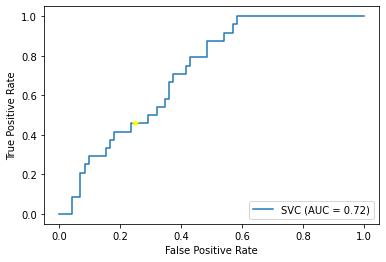

In [28]:
model = SVC(kernel="linear", C=3.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")
plt.show()

In [29]:
data = data[genes]
X_train = data.loc[ann.loc[ann["Dataset type"] == "Training"].index].to_numpy()
y_train = ann.loc[ann["Dataset type"] == "Training", "Class"].to_numpy()

X_test = data.loc[ann.loc[ann["Dataset type"] == "Validation"].index].to_numpy()
y_test = ann.loc[ann["Dataset type"] == "Validation", "Class"].to_numpy()

Balanced accuracy score: 0.685480093676815
0.75 0.7083333333333334


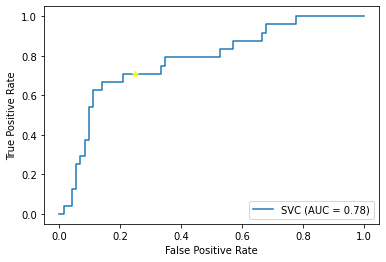

In [30]:
model = SVC(kernel="linear", C=3.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")

Problem 5

In [32]:
valid = data.loc[ann.loc[ann["Dataset type"] == "Validation"].index]
train = data.loc[ann.loc[ann["Dataset type"] == "Training"].index]

In [33]:
genes = []
for gene in data.columns:
    t = ttest_ind(valid[gene], train[gene])[1]
    if t < 0.05:
        genes.append(gene)

print(genes)

['AACS', 'AAK1', 'AAMDC', 'AAMP', 'AARS1', 'AATF', 'ABAT', 'ABCA1', 'ABCA2', 'ABCA3', 'ABCA7', 'ABCB7', 'ABCC1', 'ABCC3', 'ABCC5', 'ABCC8', 'ABCD3', 'ABCD4', 'ABCE1', 'ABHD10', 'ABHD2', 'ABLIM3', 'ABR', 'ACACA', 'ACACB', 'ACADM', 'ACD', 'ACIN1', 'ACKR1', 'ACOT13', 'ACOT7', 'ACOT8', 'ACOT9', 'ACOX3', 'ACP1', 'ACP2', 'ACP6', 'ACRV1', 'ACSBG2', 'ACSF2', 'ACSL3', 'ACTA2', 'ACTL8', 'ACTN4', 'ACTR3', 'ACTR6', 'ACVR1', 'ACVR1B', 'ACYP1', 'ADA', 'ADA2', 'ADAM11', 'ADAM17', 'ADAM21', 'ADAM22', 'ADAM23', 'ADAM8', 'ADAMTS2', 'ADAR', 'ADAT1', 'ADCK2', 'ADCY1', 'ADCY2', 'ADCY6', 'ADD1', 'ADGRA2', 'ADGRA3', 'ADGRE5', 'ADGRG3', 'ADGRL4', 'ADH5', 'ADH6', 'ADIPOR2', 'ADIRF', 'ADK', 'ADNP', 'ADNP2', 'ADORA1', 'ADORA3', 'ADPRM', 'ADRA2A', 'ADRA2C', 'ADRB2', 'ADSL', 'ADTRP', 'AFF2', 'AGAP1', 'AGBL5', 'AGFG1', 'AGGF1', 'AGPAT1', 'AGPAT2', 'AGPAT3', 'AGPAT4', 'AGPAT5', 'AHCY', 'AHCYL1', 'AHCYL2', 'AHDC1', 'AHI1', 'AHNAK', 'AHNAK2', 'AHR', 'AHSA1', 'AIFM1', 'AIMP1', 'AKAP11', 'AKAP12', 'AKAP13', 'AKAP17A', '

In [35]:
print(len(genes)/len(data.columns)*100, "%", sep="")

60.04895645452203%
